El programa genera una animación (en forma de archivo gif) para un punto moviéndose en un espacio de fases dado. Se pueden definir los parámetros de la animación y los del espacio de fases (se explica más abajo como cambiarlos). Al ejecutar el programa se generará un gif que se guardará en la misma carpeta en la que esté este archivo. (Para cambiar el nombre del archivo ver la última casilla del archivo)

Para ejecutar el programa hay que darle al botón "Run" de tal forma que se ejecuten todas las casillas por orden. 

Otra forma más sencilla es darle a "Run" y en el submenú a "Run all cells"

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.animation import PillowWriter
from tqdm.auto import tqdm
%matplotlib inline

En la siguiente casilla se modifican los parámetros del gráfico.

"tamaño" indica los límites del gráfico (tomará valores de -tamaño a +tamaño.

x_0 e y_0 indican la posición inicial en el espacio de fases.

"delta" es el intervalo de tiempo que se toma para realizar los cálculos, si se pone un valor demasiado alto el gráfico será impreciso pero si se toma demasiado bajo el punto avanzará muy despacio. El que está puesto (0.03) es un buen balance.

"num_flech" es el número de flechas (en filas y columnas) que tendrá la representación del mapa vectorial.

"num_punt" marca la longitud de la estela que deja el punto.

"frames" el número de imágenes que tendrá la animación.

"velocidad" la velocidad de reproducción de la animación.

In [18]:
tamaño = 6
x_0 = 0
y_0 = 2
delta = 0.03
num_flech = 20
num_punt = 250
frames = 240
velocidad = 30

En la casilla de abajo se indican los valores para la derivada de x (der_x) y la derivada de y (der_y). Después del "return" debajo de cada uno se indica la fórmula correspondiente. (Para funciones como seno o logaritmo se debe utilizar la función de numpy).

In [19]:
def der_x(x,y):
    return np.sin(y)

def der_y(x,y):
    return x + x**3

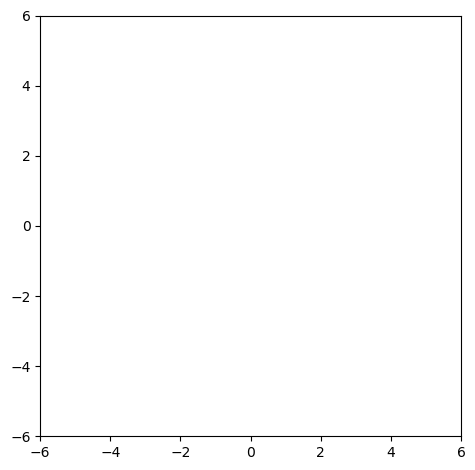

In [20]:
fig, ax = plt.subplots()
plt.gca().set_aspect("equal")
fig.tight_layout()
ax.set_xlim(-tamaño,tamaño)
ax.set_ylim(-tamaño,tamaño)
fig.tight_layout()

In [21]:
x, y = np.meshgrid(np.linspace(-tamaño,tamaño,num_flech),np.linspace(-tamaño,tamaño,num_flech))
x_m = der_x(x,y)
y_m = der_y(x,y)
mod = np.sqrt(x_m**2 + y_m**2)
x_m = x_m/mod
y_m = y_m/mod
ax.quiver(x,y,x_m,y_m)   

In [22]:
x_p = x_0
y_p = y_0
x_b = 0
y_b = 0
colors = plt.cm.Purples(np.linspace(0,1,num_punt))
x_v = np.zeros(num_punt)
y_v = np.zeros(num_punt)
t = np.arange(num_punt)

Para cambiar el nombre del archivo hay que cambiar el texto donde pone "Animation.gif". Es importante que el nuevo nombre esté entre comillas y acabe en .gif.

<b>PRECAUCIÓN</b> Si el nombre del archivo gif generado coincide con otro gif que esté en la misma carpeta sobrescribirá el archivo anterior.

Una vez ejecutada esta casilla aparecerá debajo de esta una barra de progreso que indica el tiempo para que acabe de realizarse la animación.

In [23]:
writer = PillowWriter(fps=velocidad)
with writer.saving(fig,"Animation.gif",100):
    for i in tqdm(range(frames)):

        x_v = np.insert(x_v,0,x_b)
        y_v = np.insert(y_v,0,y_b)
        
        x_v = x_v[0:num_punt]
        y_v = y_v[0:num_punt]

        ax.clear()        
        ax.set_xlim(-tamaño,tamaño)
        ax.set_ylim(-tamaño,tamaño)
        
        #cambiar la x por lo que manda, idem y (multiplicado por tiempo) 
        x_b = x_p
        y_b = y_p
        x_p += delta*(der_x(x_b,y_b))
        y_p += delta*(der_y(x_b,y_b))  
    
        #Dibujar el punto
        # plt.plot(x_v,y_v,c=colors[80],linewidth=10,zorder=0)
        ax.scatter(x_v,y_v,c=t,cmap='Purples_r',zorder=1)
        ax.quiver(x,y,x_m,y_m)

        ##Progress bar
        barra = ''
        
        
        writer.grab_frame()

  0%|          | 0/240 [00:00<?, ?it/s]